**Ceylan Anil ANR: 822874 - Ana Arrabal Ortiz  ANR: 567815 - Baris Sirin ANR: 703490**


# Quantal Response Equilibrium

In this notebook we theoretically analyze the effectiveness Quantal Response Equilibrium. 

## Table of Contents

<a href = '#1. Research Question'>1. Research Question</a>

<a href = '#2. Motivation'>2. Motivation</a>

<a href = '#3. The Assumptions of QRE'>3. The Assumptions of QRE</a>

<a href = '#4. Method'> 4. Method </a>

<a href = '#5. Answer'> 5. Answer </a>

<a href = '#6. Model Application'> 6. Model </a>

<a href = '#7. Conclusion'> 7. Conclusion </a>

<a href = '#References'> References </a>

<a id = '1. Research Question'></a>
## 1. Research Question 


Is the Nash Equilibrium effective in predicting the decision making and strategic behavior and to what extend the QRE (Quantal Response Equilibrium) enhance the quality of the prediction? 
<a id = '2. Motivation'></a>
## 2. Motivation

Nash equilibrium assumes the perfect rational behavior of society as a whole. This means both the agents are rational and they know that the other agents are rational as well. However, the literature suggests the opposite. Experimental economics studies prove that Nash equilibrium is a poor description to analyze human behavior [(Wright and Brown, 2010)](https://cs.uwaterloo.ca/~klarson/teaching/epfl/papers/Wright10-Beyond.pdf)

It is suggested by many game-theorists that QRE can enhance the predictive quality of Nash Equilibrium. In an experimental paper by [Goeree, Holt, and Palfrey (2005)](http://link.springer.com/article/10.1007/s10683-005-5374-7)
, it is proven that when the players are boundedly-rational and they face noisy decisions; the QRE can be a better estimator than the Nash Equilibrium.

Hence, we want to test empirically the efficiency of the QRE vis-à-vis the traditional Nash Equilibrium to improve our predictions on the social behavior.

<a id = '3. The Assumptions of QRE'></a>
## 3. The Assumptions of QRE

The QRE assumes that people act rationally with some error. This is the only divergence from Nash Equilibrium. Hence the QRE probability function depends on the magnitude of this error.

The probability of taking a certain strategy 1 is given by:

\begin{aligned}\sigma_{i}^{*}(l)= \frac{e^{\lambda u_{i}(l, \sigma_{-i}^{*})}}{\sum_{j} e^{\lambda u_{i}(l, \sigma_{-i}^{*})}}\end{aligned}

where i is the player, l is the action, and $\lambda $ is the measurement of the size of the error. The smaller $\lambda$ indicates more randomness, while larger $\lambda$ means we are converging to Nash equilibrium where agents are fully rational. 

<a id = '4. Method'></a>
## 4.  Method  

To illustrate, we are taking an example from the book  [“Behavioral Economics” (Cartwright,2011)](http://www.amazon.com/Behavioral-Economics-Routledge-Advanced-Finance/dp/0415573122), in *section 6.2.5*. We calculate the Quantal Responses of the game for $\lambda = 1$. Then we plot the empirical results from [McKelvey, Palfrey and Weber (2000)](http://www.sciencedirect.com/science/article/pii/S0167268100001025) on the graph for quantal response predictions for different lambda levels.

<a id = '5. Answer'></a>
## 5. Answer

As a <a href = '#7. Conclusion'> conclusion </a>, we showed that, empirical results from the actual experiment fit the predictions of QRE model. Hence, QRE predicted the strategic decisions better than the Nash Equilibrium.

<a id = '6. Model Application'></a>
## 6. Model 

Consider the game matrix in *Table1*.


| Game 1       |            |Emma   ||
| ------------- |:-------------:| :-----:|
|      |  | **Right**|  **Left**|
| **Alan**| **Up**      |   (9, 0) |(0,1) |
|   | **Down**     |    (0,1) |(1,0) |
\begin{aligned}Table 1\end{aligned}

Agents: {Alan, Emma}

Strategies: $σ_{A}=${Up, Down}, $σ_{E}=${Left, Right} 

Probability functions: $q_{U}=$ probability of action up by Alan, $p_{L}=$probability of action left by Emma

The game is played one time and simultaneously.

If we assumed Nash Equilibrium; we would find a mixed-strategy solution where Alan and Emma randomizes their actions, which is ($q_{U}=0.5$ and $p_{L}=0.1$).

However, in QRE the values of the probabilities will depend on $\lambda$. For instance, we can calculate the QRE for $\lambda = 1$.

First of all, we used following python packages to run the model.

In [52]:
from numpy import exp, array, linspace
import matplotlib.pyplot as plt
from scipy import optimize, arange
%matplotlib inline

Then we define the payoff matrix and expected utility functions for players.

In [62]:
payoffs = [[9,0],[0,1]],[[0,1],[1,0]] #2*2 game matrix

def expected_utility(pl, act, pr): #expected utility for an action
    util = payoffs[pl][act][0]*pr + payoffs[pl][act][1]*(1-pr)
    return util

After that, we define the following quantal response reaction functions.

\begin{aligned} P_{L}=\frac{e^{\lambda(1-q_{u})}}{e^{\lambda(q_{u})}+e^{\lambda(1-q_{u})}} \end{aligned} and \begin{aligned} q_{U}=\frac{e^{\lambda(9P_{L})}}{e^{\lambda(9P_{L})}+e^{\lambda(1-P_{L})}} \end{aligned}  

In [63]:
def exponential_utility(l,pl, act, pr): 
    er = exp(l*expected_utility(pl, act, pr))
    return er

def quantal_response(l, pl, act1, act2, pr): #quantal response probability
    qr = exponential_utility(l, pl, act1, pr)/(exponential_utility(l,pl,act1,pr) + exponential_utility(l,pl,act2,pr))
    return qr

If we solve these two equations we find the quantal response equilibrium for this game at $\lambda=1$, which is quite different from the nash equlibrium.


In [64]:
def vector_qr(pr, prm): #quantal response equlibrium for lambda=1 
    return array(pr) - array([quantal_response(l, prm[0], prm[0], prm[1],pr[1]), quantal_response(l, prm[1], prm[0], prm[1],pr[0])])

l=1.0
prm=[0, 1]
pr0 = [0.6, 0.2]    

ans = optimize.fsolve(vector_qr, pr0, args=(prm))

print ans

[ 0.89357633  0.31278038]


We can also show equilibrium strategy by graphical representation. 

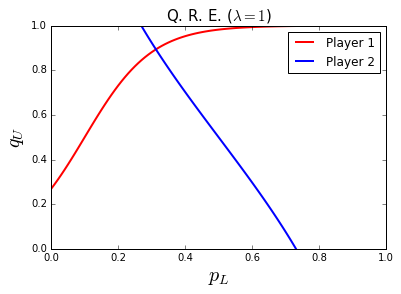

In [65]:
range_prob = arange(0.0,1.01,0.01) #range for probabilities
range_response1 = [quantal_response(l, 0, 0, 1, p) for p in range_prob] #quantal response function for player 1
range_response2 = [quantal_response(l, 1, 0, 1, p) for p in range_prob] #quantal response function for player 2

plt.clf() #quantal response equlibrium graph
plt.plot(range_prob, range_response1, '-', color='r', linewidth=2, label ='Player 1') #player1
plt.plot(range_response2, range_prob, '-', color='b', linewidth=2, label ='Player 2') #player2
plt.title('Q. R. E. ($\lambda=1$)', fontsize=15)
plt.xlabel('$p_{L}$', fontsize=20)
plt.ylabel('$q_{U}$', fontsize=20)
plt.legend()
plt.savefig('qr_equilibrium.png')

Substituting between different $\lambda$ values, Figure2 tracks the different probabilities of their actions. If $\lambda$ is zero; it would indicate they are acting randomly. We can see that in the figure, they will choose each strategy by 0.5 probability. On the contrary, if $\lambda$ approaches to infinity; the mixed equilibrium converges to mixed Nash equilibrium values ($q_{U}=0.5$ and $p_{L}=0.1$).

We used the empirical results and aproximate $\lambda$ estimates from [McKelvey, Palfrey and Weber (2000)](http://www.sciencedirect.com/science/article/pii/S0167268100001025).

We can see that depending on the magnitude of the error, the equilibrium diverges from the Nash equilibrium. Hence, considering that people are not fully rational; QRE can enhance the efficiency of estimating strategic behavior.

In [66]:
#empty list for each player
prob1=[] 
prob2=[]

#lists of responses for different lambdas
lmb = linspace(0.01, 100, 10000)
for l in lmb:
    ans = optimize.fsolve(vector_qr, pr0, args=(prm))
    prob1.append(ans[0])
    prob2.append(ans[1])

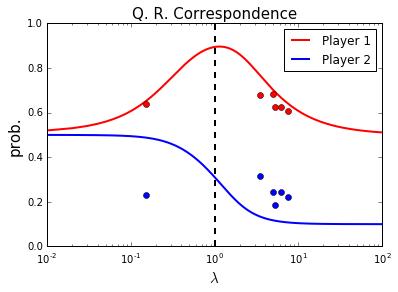

In [80]:
range_x = arange(0, 100, 1)
range_lambda = arange(0.0, 100.0, 0.01)
range_lambda2 = linspace(0.1, 100, 100)

pu=[0.623, 0.640, 0.623, 0.607, 0.680, 0.683] #observations for player 1
ql=[0.243, 0.230, 0.187, 0.223, 0.317, 0.243] #observations for player 2
lam=[6.25, 0.15, 5.25 , 7.55,3.5 , 5.0] #approximate lambda estimates

plt.clf() #responses for lambdas graph
plt.plot(range_lambda, prob1, '-', color='r', linewidth=2, label ='Player 1')
plt.plot(range_lambda, prob2, '-', color='b', linewidth=2, label ='Player 2')
plt.plot(lam, pu, 'ro')
plt.plot(lam, ql, 'bo')

plt.ylim(0.0,1.0)
plt.xscale('log')
plt.axvline(x=1, color='k', linestyle='--',linewidth=2)
plt.title('Q. R. Correspondence', fontsize=15)
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('prob.', fontsize=15)
plt.legend()
plt.savefig('qr_corr.png')

<a id = '7. Conclusion'></a>
## 7. Conclusion

In this notebook we showed that Nash Equilibrium is insufficient for predicting strategic decision making. We used the Quantal Response Equilibrium Model for better predictions,since QRE model takes  minor errors into the account, and it gets better results than Nash Equilibrium.  

<a id = 'References'></a>
## References


Cartwright, E. (2014). Behavioral economics. Routledge. 

Goeree, J. K., Holt, C. A., & Palfrey, T. R. (2005). Regular quantal response equilibrium. Experimental Economics, 8(4), 347-367.

McKelvey, R. D., Palfrey, T. R., & Weber, R. A. (2000). The effects of payoff magnitude and heterogeneity on behavior in 2× 2 games with unique mixed strategy equilibria. Journal of Economic Behavior & Organization, 42(4), 523-548.

Wright, J. R., & Leyton-Brown, K. (2010, July). Beyond Equilibrium: Predicting Human Behavior in Normal-Form Games. In AAAI. 
